In [6]:
library(openxlsx)
Data <- read.xlsx(paste(getwd(), "/8b.xlsx", sep=""), cols=c(21:25), rows=c(94:99))
names(Data)

[1] "Po[W]"   "cosθ"    "Iam[A]"  "η[%]"    "T[N・m]"

In [18]:
plotP_L = function(x, y, by, xlim, ylim, type=0, xlab="", ylab="") {
    x <- x[!is.na(x)]
    y <- y[!is.na(y)]
    sp <- splinefun(x, y)
    xest <- seq(min(x), max(x), by = by)

    yest <- sp(xest)
    plot(x, y, type="p",col="black", xlab=xlab, ylab=ylab, xlim=xlim, ylim=ylim, pch=type, axes=FALSE)
    par(new = "T")
    plot(xest, yest, type="l", col="black", xlab="", ylab="" , axes=FALSE, xlim=xlim, ylim=ylim, xaxt="n", yaxt="n")
}

plotWithLine = function(x, y, xlim, ylim, type=0, xlab="", ylab="") {
    x <- x[!is.na(x)]
    y <- y[!is.na(y)]
    plot(x, y, type="p",col="black", xlab=xlab, ylab=ylab, xlim=xlim, ylim=ylim, axes=FALSE, pch=type)

    data <- as.data.frame(x)
    fit <- lm(formula = y ~ x, data = data)
    abline(fit)
}

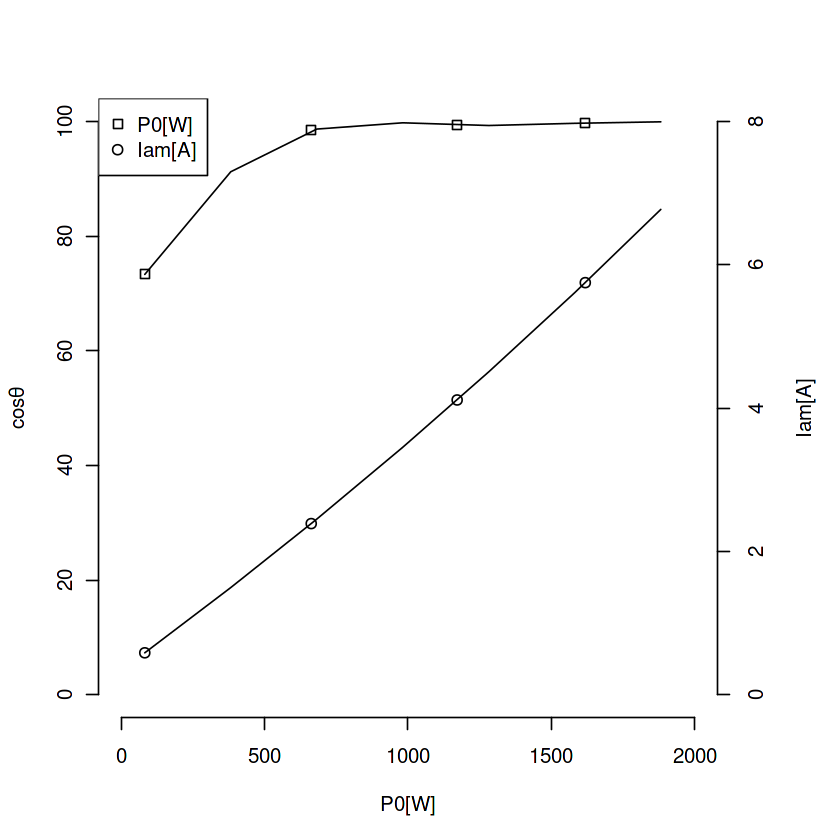

In [22]:
x <- Data$"Po[W]"
y1 <- Data$"cosθ" * 100 * -1
y2 <- Data$"Iam[A]"

mai <- par()$mai
mai[4] <- mai[1]
par(mai = mai)

plotP_L(x, y1, by=300, xlim=c(0, 2000), ylim=c(-0, 100), xlab="P0[W]", ylab="cosθ")
axis(1)
axis(2)

par(new="T")
plotP_L(x, y2, type=1,by=300 ,xlim=c(0, 2000), ylim=c(0, 8))
mtext("Iam[A]", side = 4, line = 3)
axis(4)

legend("topleft", legend=c("P0[W]", "Iam[A]"), pch=c(0, 1))

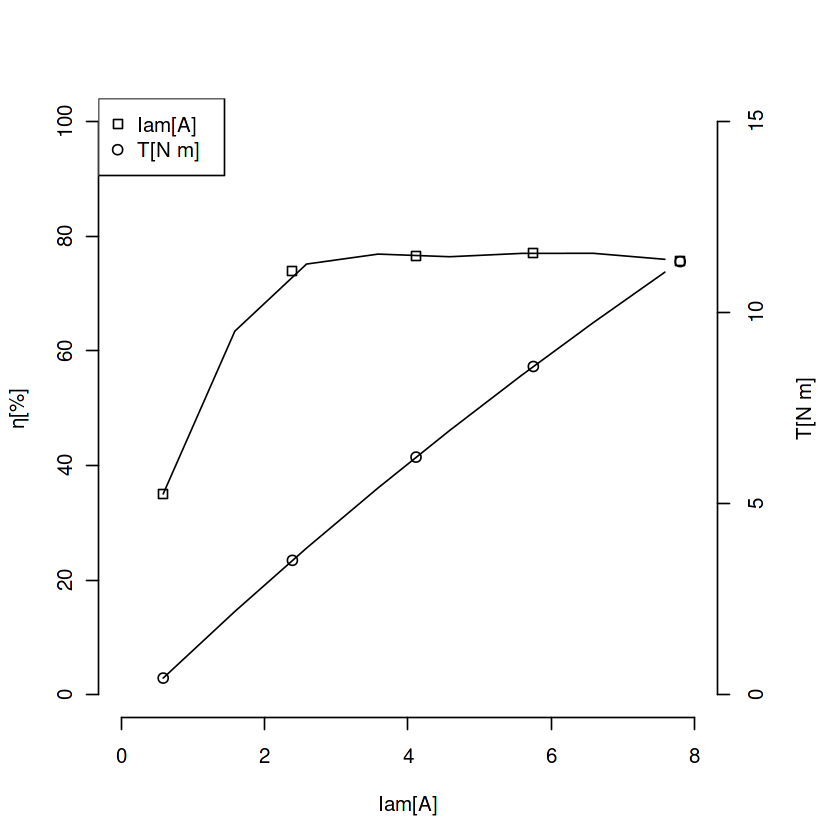

In [25]:
x <- Data$"Iam[A]"
y1 <- Data$"η[%]"
y2 <- Data$"T[N・m]"

mai <- par()$mai
mai[4] <- mai[1]
par(mai = mai)

plotP_L(x, y1, by=1, xlim=c(0, 8), ylim=c(0, 100), xlab="Iam[A]", ylab="η[%]")
axis(1)
axis(2)

par(new="T")
plotP_L(x, y2, type=1,by=1 ,xlim=c(0, 8), ylim=c(0, 15))
mtext("T[N・m]", side = 4, line = 3)
axis(4)

legend("topleft", legend=c("Iam[A]", "T[N・m]"), pch=c(0, 1))